In [7]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

02-DU

Load Dataset

In [8]:
# Let's read in the data. 
df = spark.read.csv('StressLevelDataset.csv',header=True, inferSchema=True)

Data Exploration

In [7]:
# The show method allows you visualise DataFrames. 
#df.show()
#display(df)
print(df.count())
# You could also try this. 
cols=df.columns
print(cols)
len(cols)

1100
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


21

In [8]:
i=0
for i in range(0,21,8):
    df[cols[i:i+8]].show(5)

+-------------+-----------+---------------------+----------+--------+--------------+-------------+-----------------+
|anxiety_level|self_esteem|mental_health_history|depression|headache|blood_pressure|sleep_quality|breathing_problem|
+-------------+-----------+---------------------+----------+--------+--------------+-------------+-----------------+
|           14|         20|                    0|        11|       2|             1|            2|                4|
|           15|          8|                    1|        15|       5|             3|            1|                4|
|           12|         18|                    1|        14|       2|             1|            2|                2|
|           16|         12|                    1|        15|       4|             3|            1|                3|
|           16|         28|                    0|         7|       2|             3|            5|                1|
+-------------+-----------+---------------------+----------+----

In [9]:
#df[cols[0:5]].describe().show()
i=0
for i in range(0,21,6):
    df[cols[i:i+6]].describe().show()

+-------+------------------+------------------+---------------------+------------------+------------------+------------------+
|summary|     anxiety_level|       self_esteem|mental_health_history|        depression|          headache|    blood_pressure|
+-------+------------------+------------------+---------------------+------------------+------------------+------------------+
|  count|              1100|              1100|                 1100|              1099|              1100|              1100|
|   mean|11.063636363636364|17.777272727272727|  0.49272727272727274|12.553230209281164|2.5081818181818183|2.1818181818181817|
| stddev| 6.117558185828907|  8.94459906467735|   0.5001745083837832| 7.730173890170526|1.4093559611853956|0.8335745645826571|
|    min|                 0|                 0|                    0|                 0|                 0|                 1|
|    max|                21|                30|                    1|                27|                 5|    

In [10]:
# For type, we can use print schema. 
df.printSchema()

root
 |-- anxiety_level: integer (nullable = true)
 |-- self_esteem: integer (nullable = true)
 |-- mental_health_history: integer (nullable = true)
 |-- depression: integer (nullable = true)
 |-- headache: integer (nullable = true)
 |-- blood_pressure: integer (nullable = true)
 |-- sleep_quality: integer (nullable = true)
 |-- breathing_problem: integer (nullable = true)
 |-- noise_level: integer (nullable = true)
 |-- living_conditions: integer (nullable = true)
 |-- safety: integer (nullable = true)
 |-- basic_needs: integer (nullable = true)
 |-- academic_performance: integer (nullable = true)
 |-- study_load: integer (nullable = true)
 |-- teacher_student_relationship: integer (nullable = true)
 |-- future_career_concerns: integer (nullable = true)
 |-- social_support: integer (nullable = true)
 |-- peer_pressure: integer (nullable = true)
 |-- extracurricular_activities: integer (nullable = true)
 |-- bullying: integer (nullable = true)
 |-- stress_level: integer (nullable = tru

In [3]:
#transform to pd
df_pd=df.toPandas()

In [21]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
df_freq = df.groupBy('stress_level').agg(count('stress_level').alias('frequency'))
df_freq.show()


+------------+---------+
|stress_level|frequency|
+------------+---------+
|           1|      358|
|           2|      369|
|           0|      373|
+------------+---------+



In [25]:
df_avg=df.groupby('stress_level').avg().orderBy(asc('stress_level')).toPandas()
df_avg.transpose()
#df_avg=round(df_avg.transpose(),2)

,0,1,2
stress_level,0.000000,1.000000,2.000000
avg(anxiety_level),5.431635,11.430168,16.401084
avg(self_esteem),25.252011,19.262570,8.780488
avg(mental_health_history),0.101877,0.488827,0.891599
avg(depression),6.013405,11.874302,19.842391
avg(headache),1.313673,2.460894,3.761518
avg(blood_pressure),2.195710,1.324022,3.000000
avg(sleep_quality),4.126344,2.530726,1.304348
avg(breathing_problem),1.697051,2.927374,3.653117
avg(noise_level),1.648794,2.511173,3.794038


In [9]:
df_corr=df_pd.corr()
df_corr

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694739,0.632738,0.330867,-0.709832,0.561654,0.608624,-0.568326,...,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699580,-0.626058,-0.514692,0.662138,-0.510514,-0.571169,0.550413,...,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615907,0.604826,0.295617,-0.613469,0.464347,0.515290,-0.508385,...,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694739,-0.699580,0.615907,1.000000,0.657761,0.436013,-0.693001,0.522714,0.566574,-0.530172,...,-0.608729,-0.633295,0.602466,-0.673976,0.706589,-0.617957,0.635545,0.648553,0.665807,0.734559
headache,0.632738,-0.626058,0.604826,0.657761,1.000000,0.361986,-0.637995,0.461719,0.543557,-0.532760,...,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436013,0.361986,1.000000,-0.299591,0.162308,0.352744,-0.274419,...,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.709832,0.662138,-0.613469,-0.693001,-0.637995,-0.299591,1.000000,-0.541638,-0.575848,0.534789,...,0.620248,0.670679,-0.550914,0.676981,-0.681463,0.553836,-0.648697,-0.622453,-0.698806,-0.748577
breathing_problem,0.561654,-0.510514,0.464347,0.522714,0.461719,0.162308,-0.541638,1.000000,0.459235,-0.448827,...,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.608624,-0.571169,0.515290,0.566574,0.543557,0.352744,-0.575848,0.459235,1.000000,-0.452309,...,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568326,0.550413,-0.508385,-0.530172,-0.532760,-0.274419,0.534789,-0.448827,-0.452309,1.000000,...,0.503153,0.507109,-0.437670,0.549238,-0.565087,0.466435,-0.501751,-0.515763,-0.551016,-0.581660


In [10]:
df_corr['stress_level']

anxiety_level                   0.736795
self_esteem                    -0.756195
mental_health_history           0.648644
depression                      0.734559
headache                        0.713484
blood_pressure                  0.394200
sleep_quality                  -0.748577
breathing_problem               0.573984
noise_level                     0.663371
living_conditions              -0.581660
safety                         -0.709602
basic_needs                    -0.708968
academic_performance           -0.720922
study_load                      0.634156
teacher_student_relationship   -0.680163
future_career_concerns          0.742619
social_support                 -0.632497
peer_pressure                   0.690684
extracurricular_activities      0.692977
bullying                        0.751162
stress_level                    1.000000
Name: stress_level, dtype: float64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


Visulazation

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


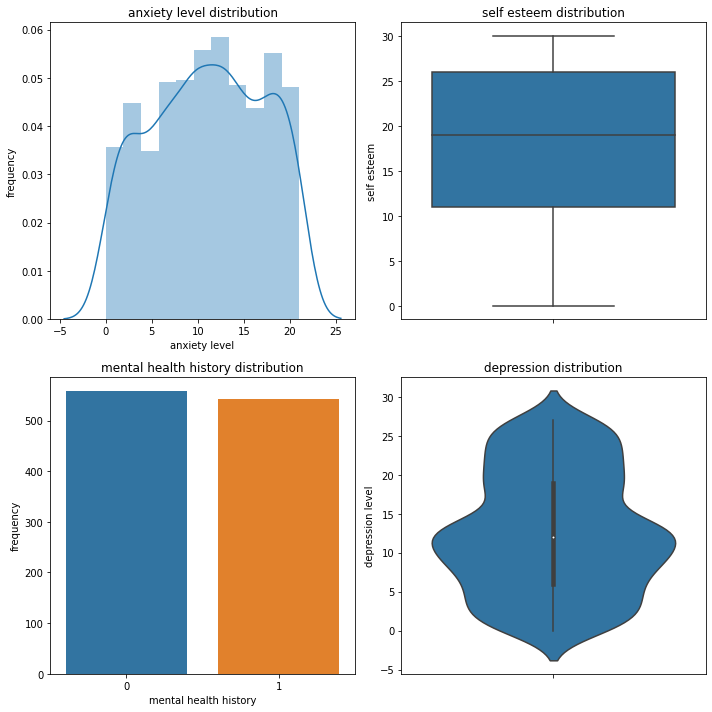

In [46]:
#1 psychological factors
plt.figure(figsize=(10,10))

# anxiety level
plt.subplot(2,2,1)
sns.distplot(df_pd['anxiety_level'], kde=True)
plt.title('anxiety level distribution')
plt.xlabel('anxiety level')
plt.ylabel('frequency')

# self esteem
plt.subplot(2,2,2)
sns.boxplot(y=df_pd['self_esteem'])
plt.title('self esteem distribution')
plt.ylabel('self esteem')

#mental health history
plt.subplot(2,2,3)
sns.countplot(x=df_pd['mental_health_history'])
plt.title('mental health history distribution')
plt.xlabel('mental health history')
plt.ylabel('frequency')

# depression
plt.subplot(2,2,4)
sns.violinplot(y=df_pd['depression'])
plt.title('depression distribution')
plt.ylabel('depression level')

plt.tight_layout()
plt.show()


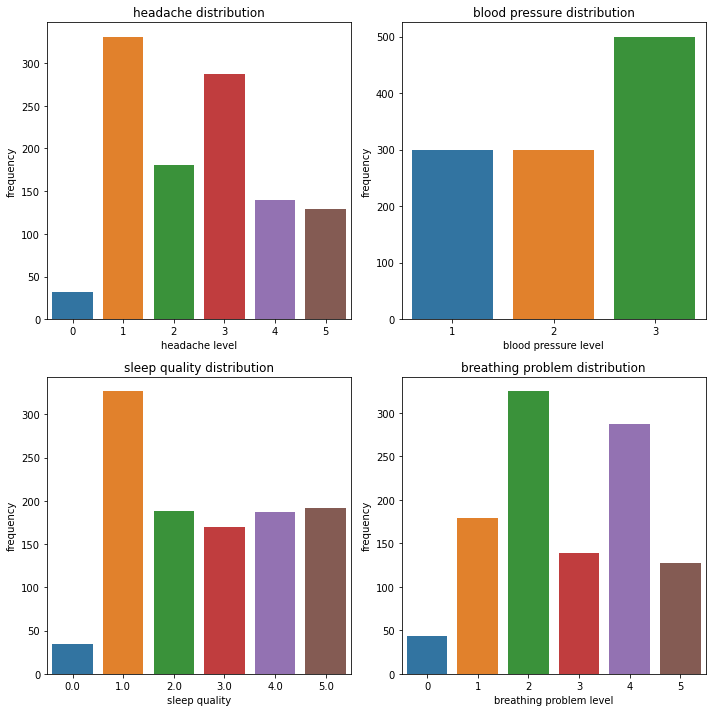

In [48]:
#2 physical factors
plt.figure(figsize=(10,10))

# headache
plt.subplot(2,2,1)
sns.countplot(x=df_pd['headache'])
plt.title('headache distribution')
plt.xlabel('headache level')
plt.ylabel('frequency')

# blood_pressure
plt.subplot(2,2,2)
sns.countplot(x=df_pd['blood_pressure'])
plt.title('blood pressure distribution')
plt.xlabel('blood pressure level')
plt.ylabel('frequency')

# sleep quality
plt.subplot(2,2,3)
sns.countplot(x=df_pd['sleep_quality'])
plt.title('sleep quality distribution')
plt.xlabel('sleep quality')
plt.ylabel('frequency')

# breathing problem
plt.subplot(2,2,4)
sns.countplot(x=df_pd['breathing_problem'])
plt.title('breathing problem distribution')
plt.xlabel('breathing problem level')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


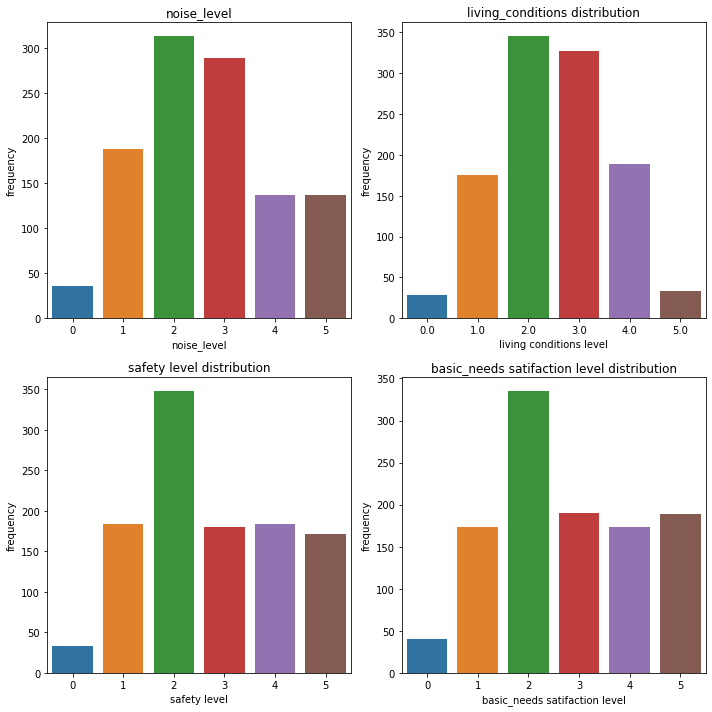

In [50]:
# 3 environmental factors
plt.figure(figsize=(10,10))

# noise_level
plt.subplot(2,2,1)
sns.countplot(x=df_pd['noise_level'])
plt.title('noise_level')
plt.xlabel('noise_level')
plt.ylabel('frequency')

# liviing condition
plt.subplot(2,2,2)
sns.countplot(x=df_pd['living_conditions'])
plt.title('living_conditions distribution')
plt.xlabel('living conditions level')
plt.ylabel('frequency')

# safety
plt.subplot(2,2,3)
sns.countplot(x=df_pd['safety'])
plt.title('safety level distribution')
plt.xlabel('safety level')
plt.ylabel('frequency')

# basic_needs
plt.subplot(2,2,4)
sns.countplot(x=df_pd['basic_needs'])
plt.title('basic_needs satifaction level distribution')
plt.xlabel('basic_needs satifaction level')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


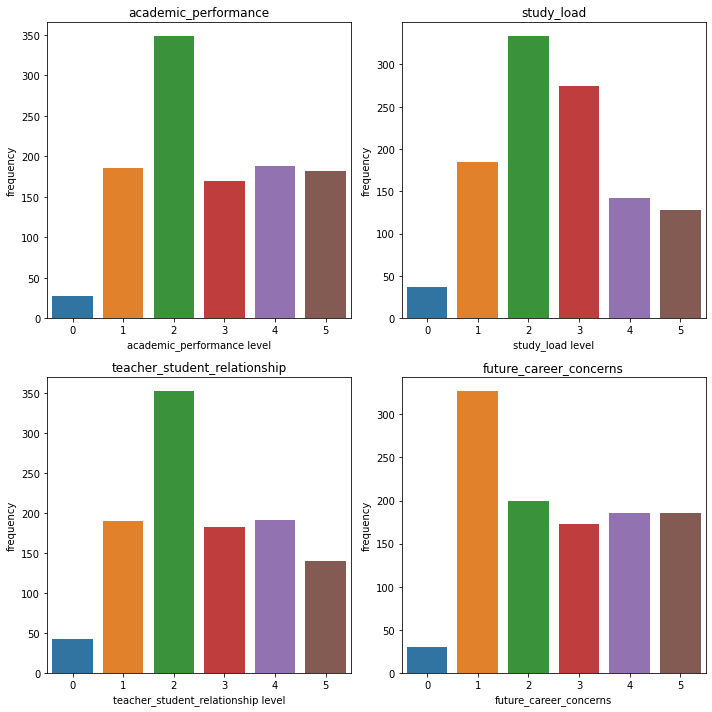

In [51]:
#03 academic factors

plt.figure(figsize=(10,10))

# 
plt.subplot(2,2,1)
sns.countplot(x=df_pd['academic_performance'])
plt.title('academic_performance')
plt.xlabel('academic_performance level')
plt.ylabel('frequency')

# 
plt.subplot(2,2,2)
sns.countplot(x=df_pd['study_load'])
plt.title('study_load')
plt.xlabel('study_load level')
plt.ylabel('frequency')

# 
plt.subplot(2,2,3)
sns.countplot(x=df_pd['teacher_student_relationship'])
plt.title('teacher_student_relationship')
plt.xlabel('teacher_student_relationship level')
plt.ylabel('frequency')

# 
plt.subplot(2,2,4)
sns.countplot(x=df_pd['future_career_concerns'])
plt.title('future_career_concerns')
plt.xlabel('future_career_concerns')
plt.ylabel('frequency')


plt.tight_layout()
plt.show()

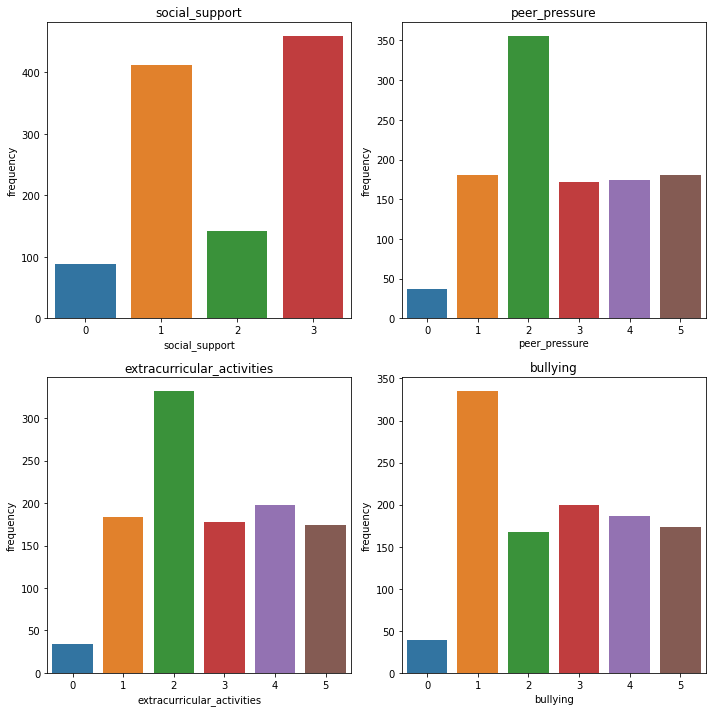

In [53]:
#4 society factors
plt.figure(figsize=(10,10))

# social support
plt.subplot(2,2,1)
sns.countplot(x=df_pd['social_support'])
plt.title('social_support')
plt.xlabel('social_support')
plt.ylabel('frequency')

# peer_pressure
plt.subplot(2,2,2)
sns.countplot(x=df_pd['peer_pressure'])
plt.title('peer_pressure')
plt.xlabel('peer_pressure')
plt.ylabel('frequency')

# extracurricular_activities
plt.subplot(2,2,3)
sns.countplot(x=df_pd['extracurricular_activities'])
plt.title('extracurricular_activities')
plt.xlabel('extracurricular_activities')
plt.ylabel('frequency')

# bullying
plt.subplot(2,2,4)
sns.countplot(x=df_pd['bullying'])
plt.title('bullying')
plt.xlabel('bullying')
plt.ylabel('frequency')


plt.tight_layout()
plt.show()

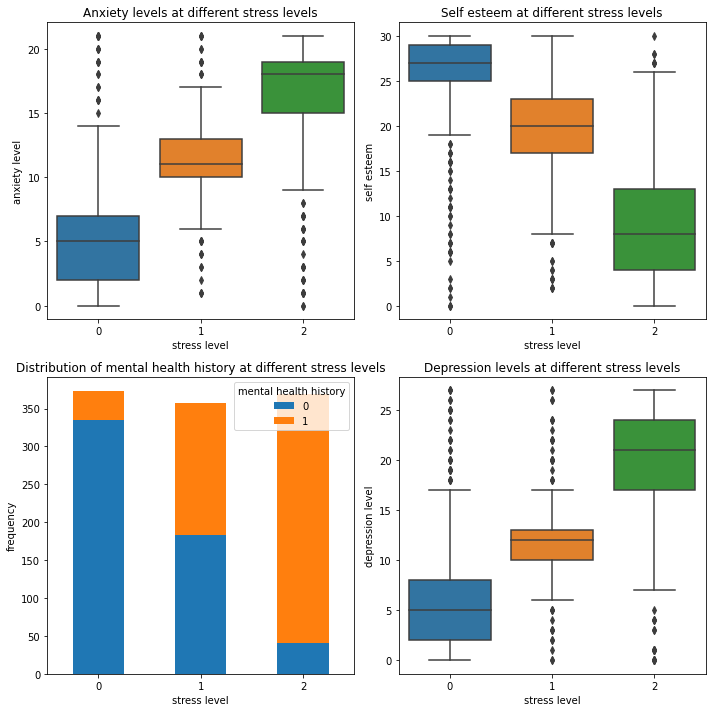

In [5]:
plt.figure(figsize=(10,10))

# anxiety level
plt.subplot(2,2,1)
sns.boxplot(x=df_pd['stress_level'],y=df_pd['anxiety_level'])
plt.title('Anxiety levels at different stress levels')
plt.xlabel('stress level')
plt.ylabel('anxiety level')

# self-esteem
plt.subplot(2,2,2)
sns.boxplot(x=df_pd['stress_level'],y=df_pd['self_esteem'])
plt.title('Self esteem at different stress levels')
plt.xlabel('stress level')
plt.ylabel('self esteem')

# mental health history
plt.subplot(2,2,3)
counts = df_pd.groupby(['stress_level','mental_health_history']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.legend(title='mental health history', loc='upper right')
plt.title('Distribution of mental health history at different stress levels')
plt.xlabel('stress level')
plt.ylabel('frequency')
plt.xticks(rotation=0)

# depression
plt.subplot(2,2,4)
sns.boxplot(x=df_pd['stress_level'],y=df_pd['depression'])
plt.title('Depression levels at different stress levels')
plt.xlabel('stress level')
plt.ylabel('depression level')

plt.tight_layout()
plt.show()